# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import os

from sklearn.utils import shuffle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
# from skopt import BayesSearchCV
# from skopt.space import Real, Integer, Categorical

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import plotly.express as px

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, precision_recall_fscore_support

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout, Dense
#from tensorflow.keras.layers.experimental import preprocessing
import tensorflow.keras.preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder



ModuleNotFoundError: No module named 'skopt'

# Data loading functions

In [53]:
# Define function to load training data from individual files
def load_training_data(folder_path, count, authors_to_include=[]):
    numbers_list = [num for num in range(1, count+1)]
    data_list = []
    filename_list = []
    iterator = 0
    for filename in os.listdir(folder_path):
        # Check if the filename contains "aggr"
            if "aggr" in filename and "complete" not in filename:
                num = filename.split("_")[2]
                if int(num) in numbers_list:
                    if iterator < count:
                        iterator += 1
                        file_path = os.path.join(folder_path, filename)
                        df = pd.read_csv(file_path, encoding='latin-1')
                        if authors_to_include:
                            df = df[df["Author"].isin(authors_to_include)]
                        # Replace NaN values with 0.0
                        df.fillna(0.0, inplace=True)
                        if df.isnull().values.any():
                            print(f"NaN values found in DataFrame: {filename}")
                            print(df[df.isnull().any(axis=1)])
                        data_list.append(df)
                        filename_list.append(filename)
    return pd.concat(data_list, ignore_index=True)

# Define function to load testing data from a single file
def load_testing_data(folder_path, count, count_adder, authors_to_include=[]):
    numbers_list = [num for num in range(count_adder+1, count_adder+count+1)]
    data_list = []
    filename_list = []
    iterator = 0
    count_iterator = 1
    for filename in os.listdir(folder_path):
        # Check if the filename contains "aggr"
            num = filename.split("_")[2]
            if "aggr" in filename and "complete" not in filename and int(num) in numbers_list:
                count_iterator += 1
                if iterator < count:
                    iterator += 1
                    file_path = os.path.join(folder_path, filename)
                    df = pd.read_csv(file_path, encoding='latin-1')
                    # Replace NaN values with 0.0
                    if authors_to_include:
                        df = df[df["Author"].isin(authors_to_include)]
                    df.fillna(0.0, inplace=True)
                    data_list.append(df)
                    filename_list.append(filename)
    return pd.concat(data_list, ignore_index=True)

def create_complete_data(folder_path, authors_to_include=[]):
    combined_df = pd.DataFrame()
    for filename in os.listdir(folder_path):
        if "aggr" in filename and "complete" not in filename:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, encoding='latin-1')

            if authors_to_include:
                df = df[df["Author"].isin(authors_to_include)]

            df.fillna(0.0, inplace=True)

            if df.isnull().values.any():
                print(f"NaN values found in DataFrame: {filename}")
                print(df[df.isnull().any(axis=1)])

            combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

# Random Forest Model

In [54]:
bom_folder_path = "BOM_authors_csv"
bible_folder_path = "Bible_authors_csv"
dc_folder_path = "DC_authors_csv"
pogp_folder_csv = "POGP_authors_csv"
hebrews_folder_path = "hebrews_authors_csv"
latewar_folder_path = "latewar_authors_csv"
spaulding_folder_csv = "SPAULDING_authors_csv"

desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
bom_df = create_complete_data(bom_folder_path, authors_to_include=desired_authors)
bible_df = create_complete_data(bible_folder_path)
dc_df = create_complete_data(dc_folder_path)
pogp_df = create_complete_data(pogp_folder_csv)
hebrews_df = create_complete_data(hebrews_folder_path)
latewar_df = create_complete_data(latewar_folder_path)
spaudling_df = create_complete_data(spaulding_folder_csv)



df = pd.concat([bom_df, dc_df, pogp_df, hebrews_df, latewar_df, spaudling_df], ignore_index=True)
df = df.fillna(0)
target = df["Author"]
features = df.drop(columns=["Author"])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

hyperparameters = {'bootstrap': True, 
                    'max_depth': None, 
                    'min_samples_leaf': 2, 
                    'min_samples_split': 10, 
                    'n_estimators': 500}

hyperparameters = {'bootstrap': False, 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


rf_model = RandomForestClassifier(**hyperparameters)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)





Accuracy: 0.6428571428571429
Precision: 0.5737524380381522
Recall: 0.6428571428571429
F1-Score: 0.59395415435734


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


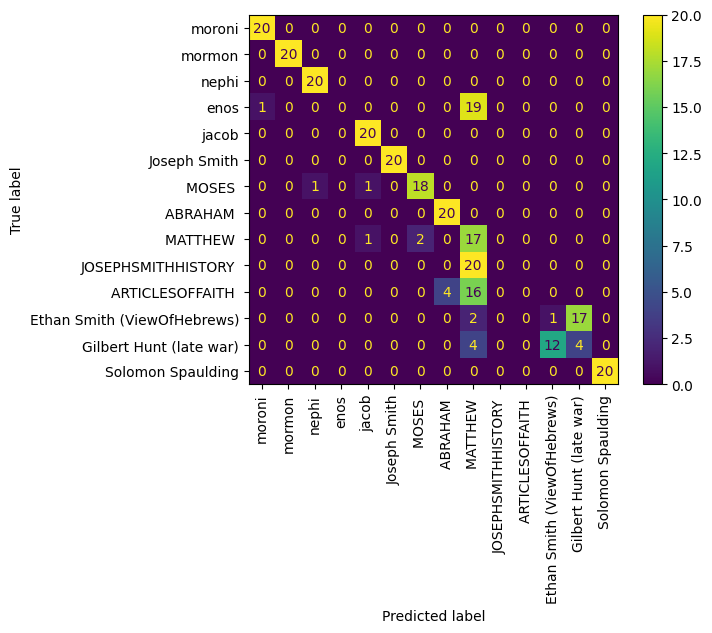

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=target.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target.unique())
disp.plot(cmap="viridis", xticks_rotation='vertical')

## RF Cross Validation

In [7]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=50)

print("Cross-validation scores:", cv_scores)

print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

feature_importances = rf_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df_top5 = importances_df.head(5)
print(importances_df_top5)

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=50.
  warnings.warn(


Cross-validation scores: [0.60869565 0.56521739 0.56521739 0.65217391 0.56521739 0.60869565
 0.60869565 0.60869565 0.56521739 0.56521739 0.60869565 0.65217391
 0.56521739 0.69565217 0.69565217 0.65217391 0.56521739 0.56521739
 0.52173913 0.56521739 0.59090909 0.63636364 0.63636364 0.63636364
 0.68181818 0.63636364 0.63636364 0.63636364 0.54545455 0.68181818
 0.68181818 0.63636364 0.72727273 0.72727273 0.68181818 0.72727273
 0.68181818 0.68181818 0.72727273 0.63636364 0.59090909 0.59090909
 0.68181818 0.63636364 0.54545455 0.59090909 0.59090909 0.63636364
 0.59090909 0.63636364]
Mean CV score: 0.6263636363636362
Standard deviation of CV scores: 0.05324451045632492
                       Feature  Importance
333  Total_Function_Word_Count    0.062756
332           Total_Word_Count    0.058510
335         AVG_Word_Per_Verse    0.040881
334        AVG_Letter_Per_Word    0.028473
313           j_percentage_use    0.027457


# RF Grid Search

In [58]:
param_grid = {
    'n_estimators': [250, 500],
    'max_depth': [5, 15,100, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 5, 7, 10, 15],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best Model: RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, random_state=42)


# K Neighbors Model

In [ ]:
train_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
# Load the training data
X_train = load_training_data("authors_csv", 90, desired_authors)
#X_train.fillna(0.0, inplace=True)
#print(X_train)
X_train = shuffle(X_train)
# Splitting data into features and target variable
y_train = X_train["Author"]
X_train = X_train.drop(columns=["Author", "Total_Word_Count", 'Total_Function_Word_Count'])

knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

test_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
X_test = load_testing_data(test_folder_path, 4, 45, desired_authors)
#X_test.fillna(0.0, inplace=True)
X_test = shuffle(X_test)
# Step 2: Preprocess testing data (drop columns not used in training)
X_test_processed = X_test.drop(columns=["Author", "Total_Word_Count", "Total_Function_Word_Count"])

# Step 3: Make predictions using the trained model
predictions = knn.predict(X_test_processed)
#y_true = X_test["Author"]
# Optional: Print the predictions
#print(predictions)
y_true = X_test["Author"]
#print(y_true)
print(predictions)
accuracy = accuracy_score(y_true, predictions)
precision = precision_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'
recall = recall_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'
f1 = f1_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Neural Net Model

# Model Creation

In [5]:
def create_model(X_train, num_authors):
  features_in_data = X_train.shape[1]
  model = Sequential()
  model.add(Dense(features_in_data, input_dim=features_in_data, activation='relu'))
  model.add(Dropout(0.2))
  #model.add(Dense(10, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.4))
  # model.add(Dense(128, activation='relu'))
  #model.add(Dropout(0.2))
  # model.add(Dense(526, activation = 'relu'))
  # #model.add(Dropout(0.2))
  model.add(Dense(num_authors, activation = 'softmax'))
  #custom_learning_rate = 0.001
  custom_learning_rate = 0.01
  optimizer = Adam(learning_rate=custom_learning_rate)
  model.compile(loss="categorical_crossentropy",optimizer=optimizer, metrics = ['accuracy'])
  return model

## Load Data & Run Model

In [6]:
test_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
df = create_complete_data(test_folder_path, authors_to_include=desired_authors)

bible_df = create_complete_data(bible_folder_path)
dc_df = create_complete_data(dc_folder_path)
df = pd.concat([df, dc_df], ignore_index=True)
df = df.fillna(0)


features = df.drop(columns=['Author'])
target = df['Author']
minMaxScaler = MinMaxScaler()
features_scaled = pd.DataFrame(minMaxScaler.fit_transform(features), columns=features.columns)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.20, random_state=42)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [7]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
num_authors = len(label_encoder.classes_)

optimizer = Adam(learning_rate=0.001)

model = create_model(X_train, num_authors)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])


early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30)
history = model.fit(X_train, y_train_encoded, epochs=1000, validation_split=0.30, batch_size= 50, callbacks=[early_stop], shuffle=True)
hist = pd.DataFrame(history.history)

Epoch 1/1000


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2261 - loss: 1.7186 - val_accuracy: 0.5764 - val_loss: 1.5571
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5634 - loss: 1.4745 - val_accuracy: 0.7014 - val_loss: 1.2445
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7617 - loss: 1.0966 - val_accuracy: 0.7708 - val_loss: 0.9430
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8407 - loss: 0.7600 - val_accuracy: 0.8125 - val_loss: 0.7734
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9058 - loss: 0.5436 - val_accuracy: 0.8125 - val_loss: 0.6823
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9446 - loss: 0.3620 - val_accuracy: 0.8611 - val_loss: 0.5446
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9521 - loss: 0.2178 - val_accuracy: 0.8264 - val_loss: 0.6008
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9558 - loss: 0.1550 - val_accuracy: 0.8333 - val_loss: 0.59

In [8]:
class_names = label_encoder.classes_

label_to_name = dict(zip(range(len(class_names)), class_names))

# Print the mapping dictionary
print("Label to Name Mapping:")
print(label_to_name)

desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]


y_pred = model.predict(X_test)


predicted_labels = label_encoder.inverse_transform(y_pred.argmax(axis=1))

# Print predicted labels
#print("Predicted labels:", predicted_labels)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)

# Step 5: Calculate precision, recall, F1-score, support
precision, recall, f1_score_nn, support = precision_recall_fscore_support(y_test, predicted_labels, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_nn)
print("Support:", support)

desired_author_labels = [np.where(class_names == author)[0][0] for author in desired_authors]

# Step 2: Filter the predictions and true labels
mask = np.isin(y_test, desired_author_labels)
filtered_y_test = y_test[mask]
filtered_predicted_labels = y_pred.argmax(axis=1)[mask]

# Step 3: Calculate accuracy for the filtered data
filtered_accuracy = accuracy_score(filtered_y_test, filtered_predicted_labels)

# Step 4: Calculate precision, recall, F1-score, and support for the filtered data
filtered_precision, filtered_recall, filtered_f1_score, filtered_support = precision_recall_fscore_support(
    filtered_y_test, filtered_predicted_labels, labels=desired_author_labels, average='weighted')

print("Filtered Metrics for Desired Authors:")
print("Accuracy:", filtered_accuracy)
print("Precision:", filtered_precision)
print("Recall:", filtered_recall)
print("F1 Score:", filtered_f1_score)

Label to Name Mapping:
{0: 'Joseph Smith', 1: 'enos', 2: 'jacob', 3: 'mormon', 4: 'moroni', 5: 'nephi'}
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.8416666666666667
Precision: 0.8443852151746888
Recall: 0.8416666666666667
F1 Score: 0.8404901960784313
Support: None
Filtered Metrics for Desired Authors:
Accuracy: nan
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Python312\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Xg Boost Regressor Model 

In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_author = encoder.fit_transform(df[['Author']])
encoded_author_df = pd.DataFrame(encoded_author, columns=encoder.get_feature_names_out(['Author']))

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
minMaxScaler = MinMaxScaler()

column_scores = {}
for i in numeric_columns:
    if i == 'Author':
        continue

    target_variable = i
    features = df.drop(columns=[target_variable])
    target = df[target_variable]

    features = pd.concat([features.drop(columns=['Author']), encoded_author_df], axis=1)

    features_scaled = pd.DataFrame(minMaxScaler.fit_transform(features), columns=features.columns)

    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.005, random_state=42)

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    n = X_test.shape[0]  
    p = X_test.shape[1]  
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    column_scores[i] = {
        "Mean Squared Error": mse,
        "R-squared": r2,
        "Adjusted R-squared": adjusted_r2,
        "Mean Absolute Error": mae,
        "Mean Absolute Percentage Error": mape
    }

# Print the results
# for column, scores in column_scores.items():
#     print(f"{column}: {scores}")

In [ ]:
r_squared_values = pd.DataFrame([
    {'R-squared': metrics['R-squared']} 
    for metrics in column_scores.values() 
    if metrics['R-squared'] >= 0
])

summary = r_squared_values.describe()

# Count values below 0 before clipping
values_below_zero = (r_squared_values < 0).sum().sum()

# Additional statistics for outliers
z_scores = (r_squared_values - r_squared_values.mean()) / r_squared_values.std()
outliers = r_squared_values[abs(z_scores) > 3].dropna()

# Check for outliers and handle separately if necessary
if not outliers.empty:
    outliers_list = outliers['R-squared'].tolist()
    outliers_summary = pd.DataFrame({'outliers': outliers_list})
else:
    outliers_summary = pd.DataFrame({'outliers': [None]})

# Clip non-numeric values from the summary DataFrame
numeric_summary = numeric_summary.clip(lower=0)
numeric_summary = summary.select_dtypes(include=[float, int])  # Only select numeric columns

# Print the numeric summary
# print("Numeric Summary:")
# print(numeric_summary)

# # Print outliers summary
# print("\nOutliers Summary:")
# print(outliers_summary)

# # Print count of values below 0
# print(f"\nCount of values below 0: {values_below_zero}")

print("Summary statistics:")
print(summary)